# 1. Setup and Data Loading


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datasets
vendor_purchase_prices = pd.read_csv('Vendor_Purchase_Prices_Dec_2017.csv')
beginning_inventory = pd.read_csv('Beginning_Inventory_Dec_31_2016.csv')
ending_inventory = pd.read_csv('Ending_Inventory_Dec_31_2016.csv')
invoice_purchases = pd.read_csv('Invoice_Purchases_Dec_31_2016.csv')
purchases = pd.read_csv('Purchases_Dec_31_2016.csv')
sales = pd.read_csv('Sales_Dec_31_2016.csv')

In [3]:
print("vendor_purchase_prices Columns:")
print(vendor_purchase_prices.columns.tolist())

print("\nbeginning_inventory Columns:")
print(beginning_inventory.columns.tolist())

print("\nending_inventory Columns:")
print(ending_inventory.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())


vendor_purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beginning_inventory Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

ending_inventory Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [ ]:
#!pip install -q pandasai
#from pandasai import PandasAI 
#from pandasai.llm.openai import OpenAI

# 2. Getting an overview of the data with ChatGPT

Based on the provided datasets and their columns, here's a summary of each dataset and the potential relationships between them:

## Datasets Summary

### vendor_purchase_prices
- **Columns:** Brand, Description, Price, Size, Volume, Classification, PurchasePrice, VendorNumber, VendorName
- **Purpose:** Appears to contain details about the cost of items purchased from various vendors, including brand, product descriptions, and pricing information.

### beginning_inventory
- **Columns:** InventoryId, Store, City, Brand, Description, Size, onHand, Price, startDate
- **Purpose:** Likely represents the inventory status at the beginning of a period, detailing what is available in each store.

### ending_inventory
- **Columns:** InventoryId, Store, City, Brand, Description, Size, onHand, Price, endDate
- **Purpose:** Likely represents the inventory status at the end of a period, similar to beginning_inventory but reflecting changes over the period.

### invoice_purchases
- **Columns:** VendorNumber, VendorName, InvoiceDate, PONumber, PODate, PayDate, Quantity, Dollars, Freight, Approval
- **Purpose:** Contains detailed records of purchases from vendors, including purchase orders, invoices, and payments.

### purchases
- **Columns:** InventoryId, Store, Brand, Description, Size, VendorNumber, VendorName, PONumber, PODate, ReceivingDate, InvoiceDate, PayDate, PurchasePrice, Quantity, Dollars, Classification
- **Purpose:** A comprehensive record of purchases, including details about items, vendors, and financial transactions.

### sales
- **Columns:** InventoryId, Store, Brand, Description, Size, SalesQuantity, SalesDollars, SalesPrice, SalesDate, Volume, Classification, ExciseTax, VendorNo, VendorName
- **Purpose:** Records details of sales transactions, including what was sold, in what quantity, and at what price, along with tax information.

## Potential Relationships

### Vendor Information
- **Datasets:** vendor_purchase_prices, invoice_purchases, purchases, and sales share 'VendorNumber' and 'VendorName'. These fields likely relate these datasets back to specific vendors.

### Inventory and Transactions
- **Datasets:** beginning_inventory, ending_inventory, purchases, and sales share 'InventoryId', 'Store', 'Brand', 'Description', 'Size', indicating they might be related by specific inventory items and locations.
- **Relationship:** beginning_inventory and ending_inventory might be directly related by 'InventoryId' to track inventory changes over a period.

### Purchasing Details
- **Datasets:** invoice_purchases and purchases share 'PONumber', 'PODate', 'InvoiceDate', 'PayDate', indicating a relationship between purchase orders and their invoicing/payment.
- **Datasets:** purchases and sales share several fields, including 'Brand', 'Description', 'Size', which could be used to correlate purchase costs with sales revenue.

### Price and Cost Tracking
- **Datasets:** vendor_purchase_prices and purchases might relate through 'PurchasePrice', 'Brand', 'Description', 'Size' to track the cost prices against the purchasing details.
- **Datasets:** sales might relate to both vendor_purchase_prices and purchases through fields like 'Brand', 'Description', 'Size', 'VendorNo' to analyze profitability.

## Summary

Each dataset appears to hold specific parts of the purchasing and inventory lifecycle, from initial product cost and vendor details (vendor_purchase_prices), through inventory management (beginning_inventory, ending_inventory), purchasing (invoice_purchases, purchases), and sales (sales). The shared fields suggest ways these datasets might be joined for various analyses, such as tracking inventory over time, analyzing purchasing habits, understanding sales trends, and calculating profitability.


# 3. Data Cleaning


In [4]:
# Function to Check and Report Missing Values
def check_missing_values(df, df_name):
    print(f"\nMissing Values in {df_name}:")
    missing_values = df.isnull().sum()  # Sum of missing values in each column
    missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
    if missing_values.empty:
        print("No missing values found.")
    else:
        print(missing_values)

# Applying the Function to Each Dataset and Reporting
datasets = {
    'Vendor Purchase Prices': vendor_purchase_prices,
    'Beginning Inventory': beginning_inventory,
    'Ending Inventory': ending_inventory,
    'Invoice Purchases': invoice_purchases,
    'Purchases': purchases,
    'Sales': sales
}

for name, dataset in datasets.items():
    check_missing_values(dataset, name)




Missing Values in Vendor Purchase Prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing Values in Beginning Inventory:
No missing values found.

Missing Values in Ending Inventory:
City    1284
dtype: int64

Missing Values in Invoice Purchases:
No missing values found.

Missing Values in Purchases:
Size    3
dtype: int64

Missing Values in Sales:
No missing values found.


In [5]:
# See if we can use the store column to infer the city
# Filter the dataset to only rows with missing 'City' values
missing_city = ending_inventory[ending_inventory['City'].isnull()]

# Group by 'Store' and count the occurrences of missing 'City' values
missing_city_grouped = missing_city.groupby('Store').size().reset_index(name='Missing City Count')

# Sort the results for better readability
missing_city_grouped_sorted = missing_city_grouped.sort_values(by='Missing City Count', ascending=False)

# Print the grouped data
print("Grouped data by Store for missing City values:")
print(missing_city_grouped_sorted)

Grouped data by Store for missing City values:
   Store  Missing City Count
0     46                1284


In [6]:
# See what are the values for the 'Approval' column
# Get the distinct values of the 'Approval' column
distinct_approval_values = invoice_purchases['Approval'].unique()

# Print the distinct values
print("Distinct values in the 'Approval' column:")
print(distinct_approval_values)

Distinct values in the 'Approval' column:
['None' 'Frank Delahunt']


In [7]:
# Handling Missing Values

# Vendor Purchase Prices
# Action Summary: Removing rows with missing values in 'Description', 'Size', and 'Volume'.
vendor_purchase_prices.dropna(subset=['Description', 'Size', 'Volume'], inplace=True)

# Ending Inventory
# Action Summary: Replacing missing 'City' values with 'Unknown'.
ending_inventory['City'].fillna('Unknown', inplace=True)

# Purchases
# Action Summary: Removing rows with missing values in 'Size'.
purchases.dropna(subset=['Size'], inplace=True)

# Print the summary of missing values after handling them
datasets = {
    'Vendor Purchase Prices': vendor_purchase_prices,
    'Beginning Inventory': beginning_inventory,
    'Ending Inventory': ending_inventory,
    'Invoice Purchases': invoice_purchases,
    'Purchases': purchases,
    'Sales': sales
}

for name, dataset in datasets.items():
    print(f"\nMissing Values in {name} after handling:")
    missing_values = dataset.isnull().sum()[dataset.isnull().sum() > 0]
    if missing_values.empty:
        print("No missing values.")
    else:
        print(missing_values)


Missing Values in Vendor Purchase Prices after handling:
No missing values.

Missing Values in Beginning Inventory after handling:
No missing values.

Missing Values in Ending Inventory after handling:
No missing values.

Missing Values in Invoice Purchases after handling:
No missing values.

Missing Values in Purchases after handling:
No missing values.

Missing Values in Sales after handling:
No missing values.


# 4. Consolidating datasets

In [8]:
# Summary statistics for numerical columns
numerical_summary = beginning_inventory[['onHand', 'Price']].describe()


# Output the results
print("Numerical Summary:\n", numerical_summary)

Numerical Summary:
               onHand          Price
count  206529.000000  206529.000000
mean       20.429455      22.253910
std        31.467342      70.178964
min         0.000000       0.000000
25%         7.000000       9.990000
50%        12.000000      14.990000
75%        21.000000      21.990000
max      1251.000000   13999.900000


In [9]:
# Summarize total purchases for each item
total_purchases = purchases.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['Quantity'].sum().reset_index()
total_purchases.rename(columns={'Quantity': 'TotalPurchased'}, inplace=True)

# Summarize total sales for each item
total_sales = sales.groupby(['InventoryId', 'Store', 'Brand', 'Description', 'Size'])['SalesQuantity'].sum().reset_index()
total_sales.rename(columns={'SalesQuantity': 'TotalSold'}, inplace=True)


In [10]:
# Merge Beginning and Ending Inventory
inventory = pd.merge(beginning_inventory, ending_inventory, 
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'], 
                     how='outer', 
                     suffixes=('_beg', '_end'))

# Merge Summarized Purchases
inventory = pd.merge(inventory, total_purchases, 
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'], 
                     how='left')

# Merge Summarized Sales
inventory = pd.merge(inventory, total_sales, 
                     on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'], 
                     how='left')


In [11]:
# Fill NaN values with 0 for TotalPurchased and TotalSold
inventory['TotalPurchased'].fillna(0, inplace=True)
inventory['TotalSold'].fillna(0, inplace=True)

In [12]:
# Calculate the total 'onHand' for the original Beginning Inventory
total_beg_inv_original = beginning_inventory['onHand'].sum()

# Calculate the total 'onHand_beg' for the merged DataFrame
total_beg_inv_merged = inventory['onHand_beg'].sum()

# Calculate the total 'onHand' for the original Ending Inventory
total_end_inv_original = ending_inventory['onHand'].sum()

# Calculate the total 'onHand_end' for the merged DataFrame
total_end_inv_merged = inventory['onHand_end'].sum()

In [13]:
# Print the results for the beginning inventory comparison
print("Total beginning inventory in the original 'Beginning Inventory' table:", total_beg_inv_original)
print("Total beginning inventory in the merged 'inventory' table:", total_beg_inv_merged)

# Check if the totals match for beginning inventory
if total_beg_inv_original == total_beg_inv_merged:
    print("The total beginning inventory matches between the original and the merged tables.")
else:
    print("The total beginning inventory does NOT match between the original and the merged tables. Please investigate.")

# Print the results for the ending inventory comparison
print("\nTotal ending inventory in the original 'Ending Inventory' table:", total_end_inv_original)
print("Total ending inventory in the merged 'inventory' table:", total_end_inv_merged)

# Check if the totals match for ending inventory
if total_end_inv_original == total_end_inv_merged:
    print("The total ending inventory matches between the original and the merged tables.")
else:
    print("The total ending inventory does NOT match between the original and the merged tables. Please investigate.")


Total beginning inventory in the original 'Beginning Inventory' table: 4219275
Total beginning inventory in the merged 'inventory' table: 4219275.0
The total beginning inventory matches between the original and the merged tables.

Total ending inventory in the original 'Ending Inventory' table: 4885776
Total ending inventory in the merged 'inventory' table: 4885776.0
The total ending inventory matches between the original and the merged tables.


In [14]:
# Calculate the expected ending inventory for each item
inventory['Expected_onHand_end'] = inventory['onHand_beg'] + inventory['TotalPurchased'] - inventory['TotalSold']

# Identify items where the expected ending inventory doesn't match the reported ending inventory
discrepancies = inventory[inventory['Expected_onHand_end'] != inventory['onHand_end']]

# If there are discrepancies, select the first one to inspect
if not discrepancies.empty:
    first_discrepancy = discrepancies.iloc[0]
    inventory_id = first_discrepancy['InventoryId']
    print(f"First item with a discrepancy: {inventory_id}")
    print(first_discrepancy)
else:
    print("No discrepancies found between expected and reported ending inventory.")


First item with a discrepancy: 1_HARDERSFIELD_58
InventoryId                      1_HARDERSFIELD_58
Store                                            1
City_beg                              HARDERSFIELD
Brand                                           58
Description            Gekkeikan Black & Gold Sake
Size                                         750mL
onHand_beg                                     8.0
Price_beg                                    12.99
startDate                               2016-01-01
City_end                              HARDERSFIELD
onHand_end                                    11.0
Price_end                                    12.99
endDate                                 2016-12-31
TotalPurchased                               105.0
TotalSold                                     11.0
Expected_onHand_end                          102.0
Name: 0, dtype: object


In [15]:
if not discrepancies.empty:
    # Filter and display the item's details from each original dataset
    print("\nBeginning Inventory Record:")
    display(beginning_inventory[beginning_inventory['InventoryId'] == inventory_id])

    print("\nEnding Inventory Record:")
    display(ending_inventory[ending_inventory['InventoryId'] == inventory_id])

    print("\nPurchase Records:")
    display(purchases[purchases['InventoryId'] == inventory_id])

    print("\nSales Records:")
    display(sales[sales['InventoryId'] == inventory_id])



Beginning Inventory Record:


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01



Ending Inventory Record:


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31



Purchase Records:


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
6575,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,8166,2015-12-23,2016-01-01,2016-01-08,2016-02-11,9.28,6,55.68,1
267751,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,8835,2016-02-08,2016-02-17,2016-02-27,2016-03-31,9.28,6,55.68,1
307840,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,8920,2016-02-14,2016-02-26,2016-03-01,2016-04-15,9.28,6,55.68,1
455767,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,9353,2016-03-15,2016-03-25,2016-04-04,2016-04-30,9.28,6,55.68,1
733550,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,10090,2016-05-05,2016-05-12,2016-05-17,2016-07-03,9.28,5,46.40,1
826935,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,10234,2016-05-15,2016-05-24,2016-05-30,2016-07-01,9.28,6,55.68,1
1290622,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,11292,2016-07-20,2016-07-26,2016-08-01,2016-09-12,9.28,6,55.68,1
1341783,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,11336,2016-07-24,2016-08-04,2016-08-15,2016-09-19,9.28,6,55.68,1
1493888,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,11698,2016-08-17,2016-08-24,2016-09-01,2016-10-08,9.28,5,46.40,1
1593583,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,8320,SHAW ROSS INT L IMP LTD,11895,2016-08-31,2016-09-07,2016-09-20,2016-10-25,9.28,6,55.68,1



Sales Records:


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
14426,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,1,12.99,12.99,1/7/2016,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
951497,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,2,25.98,12.99,2/10/2016,750,1,1.57,8320,SHAW ROSS INT L IMP LTD
951498,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,1,12.99,12.99,2/11/2016,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
951499,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,1,12.99,12.99,2/13/2016,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
951500,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,1,12.99,12.99,2/14/2016,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
951501,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,1,12.99,12.99,2/16/2016,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
951502,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,1,12.99,12.99,2/18/2016,750,1,0.79,8320,SHAW ROSS INT L IMP LTD
951503,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,2,25.98,12.99,2/20/2016,750,1,1.57,8320,SHAW ROSS INT L IMP LTD
951504,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,1,12.99,12.99,2/23/2016,750,1,0.79,8320,SHAW ROSS INT L IMP LTD


In [16]:
# Initial on hand from the Beginning Inventory Record
initial_on_hand = beginning_inventory[beginning_inventory['InventoryId'] == '1_HARDERSFIELD_58']['onHand'].sum()

# Total purchases throughout the year from the Purchase Records
total_purchases = purchases[purchases['InventoryId'] == '1_HARDERSFIELD_58']['Quantity'].sum()

# Total sales throughout the year from the Sales Records
total_sales = sales[sales['InventoryId'] == '1_HARDERSFIELD_58']['SalesQuantity'].sum()

# Calculate the expected ending inventory
expected_ending_inventory = initial_on_hand + total_purchases - total_sales

# Print the results
print(f"Initial on hand: {initial_on_hand}")
print(f"Total purchases: {total_purchases}")
print(f"Total sales: {total_sales}")
print(f"Expected ending inventory: {expected_ending_inventory}")

# Compare with the reported ending inventory
reported_ending_inventory = ending_inventory[ending_inventory['InventoryId'] == '1_HARDERSFIELD_58']['onHand'].sum()
print(f"Reported ending inventory: {reported_ending_inventory}")


Initial on hand: 8
Total purchases: 105
Total sales: 11
Expected ending inventory: 102
Reported ending inventory: 11


In [17]:
print(inventory.columns.tolist())

['InventoryId', 'Store', 'City_beg', 'Brand', 'Description', 'Size', 'onHand_beg', 'Price_beg', 'startDate', 'City_end', 'onHand_end', 'Price_end', 'endDate', 'TotalPurchased', 'TotalSold', 'Expected_onHand_end']


# 5. Exploratory Data Analysis

In [19]:
print(inventory.info())
print(inventory.describe())
print(inventory.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 258693 entries, 0 to 258692
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InventoryId          258693 non-null  object 
 1   Store                258693 non-null  int64  
 2   City_beg             206529 non-null  object 
 3   Brand                258693 non-null  int64  
 4   Description          258693 non-null  object 
 5   Size                 258693 non-null  object 
 6   onHand_beg           206529 non-null  float64
 7   Price_beg            206529 non-null  float64
 8   startDate            206529 non-null  object 
 9   City_end             224489 non-null  object 
 10  onHand_end           224489 non-null  float64
 11  Price_end            224489 non-null  float64
 12  endDate              224489 non-null  object 
 13  TotalPurchased       258693 non-null  float64
 14  TotalSold            258693 non-null  float64
 15  Expected_onHand_e

In [20]:
# Columns with null values
columns_with_nulls = ['City_beg', 'onHand_beg', 'Price_beg', 'startDate', 'City_end', 'onHand_end', 'Price_end', 'endDate', 'Expected_onHand_end']

# Filter the DataFrame for rows where any of the specified columns have a null value
rows_with_nulls = inventory[inventory[columns_with_nulls].isnull().any(axis=1)]

# Display the first 10 rows with nulls
rows_with_nulls.head(10)


,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,TotalPurchased,TotalSold,Expected_onHand_end
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7.0,10.99,2016-01-01,NaN,NaN,NaN,NaN,36.0,7.0,36.0
9,1_HARDERSFIELD_120,1,HARDERSFIELD,120,Tarantula Azul Tequila Gift,750mL,11.0,13.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,5.0,6.0
11,1_HARDERSFIELD_165,1,HARDERSFIELD,165,Gentleman Jack Gift Pack,750mL,0.0,26.99,2016-01-01,NaN,NaN,NaN,NaN,24.0,0.0,24.0
14,1_HARDERSFIELD_178,1,HARDERSFIELD,178,Wild Turkey Russell's RSV,750mL,24.0,26.99,2016-01-01,NaN,NaN,NaN,NaN,12.0,4.0,32.0
18,1_HARDERSFIELD_247,1,HARDERSFIELD,247,Gran Patron Platinum Tequil,750mL,1.0,199.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,0.0,1.0
22,1_HARDERSFIELD_281,1,HARDERSFIELD,281,Kamora Coffee Gift Pack,750mL,1.0,9.99,2016-01-01,NaN,NaN,NaN,NaN,18.0,1.0,18.0
23,1_HARDERSFIELD_283,1,HARDERSFIELD,283,Milagro Tequila Reposado SBR,750mL,4.0,57.99,2016-01-01,NaN,NaN,NaN,NaN,0.0,2.0,2.0
27,1_HARDERSFIELD_311,1,HARDERSFIELD,311,The Glenlivet 12 Yr Gift Pk,750mL,8.0,41.99,2016-01-01,NaN,NaN,NaN,NaN,24.0,6.0,26.0
28,1_HARDERSFIELD_323,1,HARDERSFIELD,323,Tequila Rose Strawberry Gift,750mL,6.0,13.99,2016-01-01,NaN,NaN,NaN,NaN,18.0,3.0,21.0
30,1_HARDERSFIELD_356,1,HARDERSFIELD,356,Carolans Irish Cr Gift Set,750mL,0.0,11.49,2016-01-01,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [21]:
# Filter the DataFrame for rows with no null values across all columns
rows_with_all_data = inventory.dropna()

# Display the first 10 rows where all columns are populated
rows_with_all_data.head(10)


,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,TotalPurchased,TotalSold,Expected_onHand_end
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8.0,12.99,2016-01-01,HARDERSFIELD,11.0,12.99,2016-12-31,105.0,11.0,102.0
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6.0,36.99,2016-01-01,HARDERSFIELD,7.0,36.99,2016-12-31,116.0,20.0,102.0
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3.0,38.99,2016-01-01,HARDERSFIELD,7.0,38.99,2016-12-31,59.0,9.0,53.0
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6.0,34.99,2016-01-01,HARDERSFIELD,4.0,34.99,2016-12-31,0.0,0.0,6.0
5,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,18.0,14.99,2016-01-01,HARDERSFIELD,7.0,14.99,2016-12-31,0.0,3.0,15.0
6,1_HARDERSFIELD_77,1,HARDERSFIELD,77,Three Olives Espresso Vodka,750mL,7.0,14.99,2016-01-01,HARDERSFIELD,18.0,14.99,2016-12-31,132.0,27.0,112.0
7,1_HARDERSFIELD_79,1,HARDERSFIELD,79,Three Olives Loopy Vodka,750mL,2.0,14.99,2016-01-01,HARDERSFIELD,7.0,14.99,2016-12-31,96.0,8.0,90.0
8,1_HARDERSFIELD_115,1,HARDERSFIELD,115,Belvedere Vodka,Liter,5.0,27.99,2016-01-01,HARDERSFIELD,35.0,27.99,2016-12-31,150.0,15.0,140.0
10,1_HARDERSFIELD_126,1,HARDERSFIELD,126,Grey Goose Vodka,Liter,17.0,29.99,2016-01-01,HARDERSFIELD,36.0,29.99,2016-12-31,530.0,36.0,511.0
12,1_HARDERSFIELD_171,1,HARDERSFIELD,171,Gentleman Jack,1.75L,12.0,49.99,2016-01-01,HARDERSFIELD,24.0,49.99,2016-12-31,96.0,17.0,91.0


In [22]:
# Filter for rows where 'onHand_end' is equal to 'Expected_onHand_end'
matching_rows = inventory[inventory['onHand_end'] == inventory['Expected_onHand_end']]

# Display the first 10 rows where the condition is met
matching_rows.head(10)


,InventoryId,Store,City_beg,Brand,Description,Size,onHand_beg,Price_beg,startDate,City_end,onHand_end,Price_end,endDate,TotalPurchased,TotalSold,Expected_onHand_end
41,1_HARDERSFIELD_425,1,HARDERSFIELD,425,Hennessy Paradis,750mL,1.0,799.99,2016-01-01,HARDERSFIELD,1.0,799.99,2016-12-31,0.0,0.0,1.0
79,1_HARDERSFIELD_780,1,HARDERSFIELD,780,Svedka Clementine Vodka,Liter,14.0,12.99,2016-01-01,HARDERSFIELD,13.0,12.99,2016-12-31,0.0,1.0,13.0
101,1_HARDERSFIELD_883,1,HARDERSFIELD,883,Patron Burdeos Anejo Tequila,750mL,2.0,499.99,2016-01-01,HARDERSFIELD,2.0,499.99,2016-12-31,0.0,0.0,2.0
109,1_HARDERSFIELD_950,1,HARDERSFIELD,950,Mastersons 10 Yr Old Rye,750mL,2.0,79.99,2016-01-01,HARDERSFIELD,1.0,79.99,2016-12-31,0.0,1.0,1.0
116,1_HARDERSFIELD_1001,1,HARDERSFIELD,1001,Baileys 50mL 4 Pack,50mL 4 Pk,0.0,5.99,2016-01-01,HARDERSFIELD,0.0,5.99,2016-12-31,0.0,0.0,0.0
147,1_HARDERSFIELD_1106,1,HARDERSFIELD,1106,Aberfeldy Single Cask,750mL,8.0,229.99,2016-01-01,HARDERSFIELD,8.0,249.99,2016-12-31,0.0,0.0,8.0
175,1_HARDERSFIELD_1274,1,HARDERSFIELD,1274,No. 14 Bourbon,750mL,0.0,44.99,2016-01-01,HARDERSFIELD,0.0,44.99,2016-12-31,0.0,0.0,0.0
297,1_HARDERSFIELD_2029,1,HARDERSFIELD,2029,Springbank 10 Yr Scotch,750mL,8.0,73.99,2016-01-01,HARDERSFIELD,11.0,73.99,2016-12-31,6.0,3.0,11.0
351,1_HARDERSFIELD_2182,1,HARDERSFIELD,2182,McClelland Islay Single Mal,750mL,0.0,18.99,2016-01-01,HARDERSFIELD,12.0,19.99,2016-12-31,12.0,0.0,12.0
354,1_HARDERSFIELD_2186,1,HARDERSFIELD,2186,Label 5 Scotch 12 Yr,750mL,8.0,31.99,2016-01-01,HARDERSFIELD,7.0,31.99,2016-12-31,0.0,1.0,7.0


# 6. Discrepancy Analysis

In [23]:
inventory['Discrepancy'] = inventory['Expected_onHand_end'] - inventory['onHand_end']


In [24]:
print(inventory['Discrepancy'].describe())


count    172325.000000
mean        152.488664
std         341.055875
min        -269.000000
25%          23.000000
50%          61.000000
75%         149.000000
max       12170.000000
Name: Discrepancy, dtype: float64


In [25]:
# Calculate the price for calculation and discrepancy value
inventory['Price_for_Calculation'] = inventory['Price_end'].fillna(inventory['Price_beg'])
inventory['Discrepancy'] = pd.to_numeric(inventory['Discrepancy'], errors='coerce')
inventory['Discrepancy_Value'] = inventory['Discrepancy'] * inventory['Price_for_Calculation']

# Format the discrepancy value as dollars with commas
inventory['Discrepancy_Value_Dollars'] = inventory['Discrepancy_Value'].apply(lambda x: "${:,.2f}".format(x))

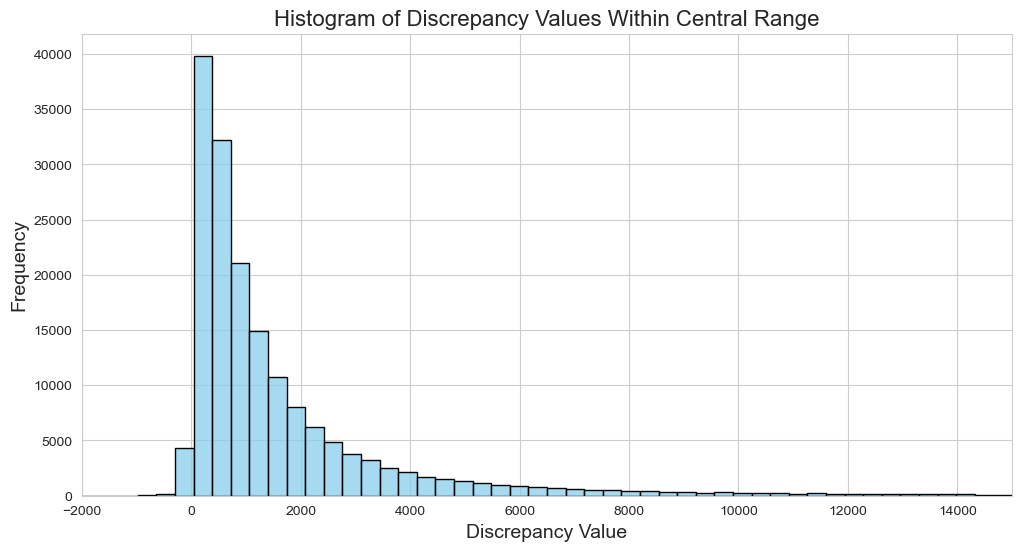

In [26]:

central_range = (-2000, 15000)

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create the histogram using seaborn for a more polished look
plt.figure(figsize=(12, 6))
sns.histplot(inventory['Discrepancy_Value'], bins=50, kde=False, color='skyblue', edgecolor='black', binrange=central_range)

# Additional visual improvements can be made here
plt.title('Histogram of Discrepancy Values Within Central Range', fontsize=16)
plt.xlabel('Discrepancy Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(central_range)  # Ensure the x-axis only shows the central range

# Show the plot with seaborn's improved visuals
plt.show()

In [27]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import layout

# Enable plot display in Jupyter notebook
output_notebook()

# Assuming 'inventory' DataFrame is already loaded and 'Discrepancy_Value' is correctly formatted.
central_range = (-2000, 15000)

# Create a histogram with fixed bins
hist, edges = np.histogram(inventory['Discrepancy_Value'], bins=50, range=central_range)

# Create a ColumnDataSource from the histogram data
source = ColumnDataSource(data=dict(top=hist, left=edges[:-1], right=edges[1:]))

# Create a new figure
p = figure(title='Histogram of Discrepancy Values Within Central Range', 
           x_axis_label='Discrepancy Value', 
           y_axis_label='Frequency',
           background_fill_color="#fafafa")

# Add a quad glyph with source this time
p.quad(top='top', bottom=0, left='left', right='right', source=source,
       fill_color='skyblue', line_color='black', hover_fill_alpha=0.7, hover_fill_color='navy')

# Add hover tool
hover = HoverTool(tooltips=[('Discrepancy Value', '@left{0,0} - @right{0,0}'),
                             ('Frequency', '@top')],
                  mode='vline')
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

In [28]:
# Identify the top 5 products with positive discrepancy value
top_positive_discrepancies = inventory[inventory['Discrepancy_Value'] > 0].sort_values(by='Discrepancy_Value', ascending=False).head(5)
positive_detailed_view = top_positive_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City_end', 'Discrepancy', 'Discrepancy_Value_Dollars']]

# Identify the top 5 products with negative discrepancy value
top_negative_discrepancies = inventory[inventory['Discrepancy_Value'] < 0].sort_values(by='Discrepancy_Value').head(5)
negative_detailed_view = top_negative_discrepancies[['InventoryId', 'Description', 'Store', 'Brand', 'City_end', 'Discrepancy', 'Discrepancy_Value_Dollars']]

# Print the results
print("Top 5 Products with Positive Discrepancy Value:")
positive_detailed_view



Top 5 Products with Positive Discrepancy Value:


,InventoryId,Description,Store,Brand,City_end,Discrepancy,Discrepancy_Value_Dollars
118538,50_MOUNTMEND_1233,Jack Daniels No 7 Black,50,1233,MOUNTMEND,8428.0,"$294,895.72"
195379,76_DONCASTER_3405,Tito's Handmade Vodka,76,3405,DONCASTER,9542.0,"$276,622.58"
120118,50_MOUNTMEND_8068,Absolut 80 Proof,50,8068,MOUNTMEND,9285.0,"$218,104.65"
79283,34_PITMERDEN_3545,Ketel One Vodka,34,3545,PITMERDEN,7119.0,"$213,498.81"
195432,76_DONCASTER_3545,Ketel One Vodka,76,3545,DONCASTER,7100.0,"$212,929.00"


In [29]:
print("\nTop 5 Products with Negative Discrepancy Value:")
negative_detailed_view


Top 5 Products with Negative Discrepancy Value:


,InventoryId,Description,Store,Brand,City_end,Discrepancy,Discrepancy_Value_Dollars
168049,67_EANVERNESS_35464,Stags Leap WC Artemis Cab,67,35464,EANVERNESS,-125.0,"$-6,123.75"
162888,66_EANVERNESS_35464,Stags Leap WC Artemis Cab,66,35464,EANVERNESS,-90.0,"$-4,409.10"
118742,50_MOUNTMEND_2209,Pendleton 1910 Rye,50,2209,MOUNTMEND,-222.0,"$-3,993.78"
192217,74_PAENTMARWY_35464,Stags Leap WC Artemis Cab,74,35464,PAENTMARWY,-72.0,"$-3,527.28"
79560,34_PITMERDEN_4225,Goslings Black Seal Rum 80,34,4225,PITMERDEN,-128.0,"$-3,326.72"


Our discrepancy analysis has provided valuable insights into inventory accuracy and potential operational inefficiencies. For the top 5 products with a positive discrepancy, where actual inventory is less than expected, it's crucial to investigate discrepancies that may indicate unrecorded sales, stock losses, or other issues affecting inventory accuracy. Immediate actions should include reviewing sales recording practices, assessing theft or loss, and evaluating demand forecasting accuracy. Conversely, the top 5 products with a negative discrepancy, where actual inventory exceeds expectations, suggest potential overstocking or underreporting of sales. For these items, we recommend analyzing purchasing practices, reassessing demand forecasting, and improving inventory tracking systems. By addressing these discrepancies, the company can improve inventory accuracy, enhance financial reporting, and optimize stock levels, leading to better operational efficiency and customer satisfaction.

# 7. Recommended Inventory Level

In [30]:
# Calculate the total sales volume for each product
sales_volume = inventory.groupby(['InventoryId', 'Description'])['TotalSold'].sum()

# Sort the products based on sales volume and select the top 20
top_20_critical = sales_volume.sort_values(ascending=False).head(20)
print(top_20_critical)


InventoryId          Description                 
1_HARDERSFIELD_8111  Smirnoff 80 Proof               1142.0
10_HORNSEY_8111      Smirnoff 80 Proof               1104.0
34_PITMERDEN_4261    Capt Morgan Spiced Rum          1055.0
53_HILLFAR_8111      Smirnoff 80 Proof                939.0
10_HORNSEY_4157      Smirnoff Green Apple Vodka       927.0
10_HORNSEY_1892      Yukon Jack                       921.0
27_MOUNTMEND_8111    Smirnoff 80 Proof                909.0
10_HORNSEY_5491      Rumpleminze                      905.0
14_BROMWICH_1892     Yukon Jack                       854.0
14_BROMWICH_4261     Capt Morgan Spiced Rum           850.0
34_PITMERDEN_3545    Ketel One Vodka                  843.0
10_HORNSEY_4261      Capt Morgan Spiced Rum           836.0
10_HORNSEY_3606      Smirnoff Raspberry Vodka         821.0
34_PITMERDEN_8111    Smirnoff 80 Proof                812.0
77_TAMWORTH_5111     Dr McGillicuddy's Mentholmnt     811.0
15_WANBORNE_8068     Absolut 80 Proof             

In [31]:
# Extract the Inventory IDs for the top 20 products
top_20_inventory_ids = top_20_critical.index.get_level_values('InventoryId').tolist()


In [32]:
# Convert 'PODate' and 'ReceivingDate' to datetime objects
purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Convert 'SalesDate' to datetime objects
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])


In [34]:
# Retrieve the first InventoryId from your top 20 list
first_inventory_id = top_20_inventory_ids[0]
print("Investigating InventoryId:", first_inventory_id)

# Beginning and Ending Inventory
beginning_inventory = inventory[inventory['InventoryId'] == first_inventory_id]['onHand_beg'].sum()
ending_inventory = inventory[inventory['InventoryId'] == first_inventory_id]['onHand_end'].sum()

# Total Sales for the product
total_sales = sales[sales['InventoryId'] == first_inventory_id]['SalesQuantity'].sum()

print(f"Beginning Inventory for {first_inventory_id}: {beginning_inventory}")
print(f"Ending Inventory for {first_inventory_id}: {ending_inventory}")
print(f"Total Sales for {first_inventory_id}: {total_sales}")

# Total Purchases for the product
total_purchases = purchases[purchases['InventoryId'] == first_inventory_id]['Quantity'].sum()

print(f"Total Purchases for {first_inventory_id}: {total_purchases}")


Investigating InventoryId: 1_HARDERSFIELD_8111
Beginning Inventory for 1_HARDERSFIELD_8111: 58.0
Ending Inventory for 1_HARDERSFIELD_8111: 417.0
Total Sales for 1_HARDERSFIELD_8111: 1142
Total Purchases for 1_HARDERSFIELD_8111: 6522


In [35]:
# Calculate the total sales period for each product
total_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days

# Calculate the average daily sales for the top 20 products
ads = sales[sales['InventoryId'].isin(top_20_inventory_ids)].groupby('InventoryId')['SalesQuantity'].sum() / total_days

print("Average Daily Sales for Top 20 Products:")
print(ads)


Average Daily Sales for Top 20 Products:
InventoryId
10_HORNSEY_1892        15.610169
10_HORNSEY_3606        13.915254
10_HORNSEY_4135        12.932203
10_HORNSEY_4157        15.711864
10_HORNSEY_4261        14.169492
10_HORNSEY_5491        15.338983
10_HORNSEY_8053        13.288136
10_HORNSEY_8111        18.711864
14_BROMWICH_1892       14.474576
14_BROMWICH_4261       14.406780
15_WANBORNE_8068       13.728814
1_HARDERSFIELD_3609    13.169492
1_HARDERSFIELD_8111    19.355932
27_MOUNTMEND_1892      13.491525
27_MOUNTMEND_8111      15.406780
34_PITMERDEN_3545      14.288136
34_PITMERDEN_4261      17.881356
34_PITMERDEN_8111      13.762712
53_HILLFAR_8111        15.915254
77_TAMWORTH_5111       13.745763
Name: SalesQuantity, dtype: float64


In [36]:
# Calculate lead time for each purchase
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Calculate the average lead time for the top 20 products
average_lt = purchases[purchases['InventoryId'].isin(top_20_inventory_ids)].groupby('InventoryId')['LeadTime'].mean()

print("Average Lead Time for Top 20 Products:")
print(average_lt)


Average Lead Time for Top 20 Products:
InventoryId
10_HORNSEY_1892        8.105263
10_HORNSEY_3606        8.258621
10_HORNSEY_4135        7.900000
10_HORNSEY_4157        7.963636
10_HORNSEY_4261        7.676190
10_HORNSEY_5491        7.939394
10_HORNSEY_8053        8.152778
10_HORNSEY_8111        7.961538
14_BROMWICH_1892       6.492063
14_BROMWICH_4261       6.612903
15_WANBORNE_8068       7.339623
1_HARDERSFIELD_3609    7.869565
1_HARDERSFIELD_8111    8.317460
27_MOUNTMEND_1892      7.658228
27_MOUNTMEND_8111      7.597938
34_PITMERDEN_3545      6.971154
34_PITMERDEN_4261      6.990909
34_PITMERDEN_8111      7.275510
53_HILLFAR_8111        7.656863
77_TAMWORTH_5111       7.629213
Name: LeadTime, dtype: float64


In [37]:
print("Verifying Data Availability for Top 20 Products:")
print("ADS Available for:", ads.index.tolist())
print("Lead Time Available for:", average_lt.index.tolist())


Verifying Data Availability for Top 20 Products:
ADS Available for: ['10_HORNSEY_1892', '10_HORNSEY_3606', '10_HORNSEY_4135', '10_HORNSEY_4157', '10_HORNSEY_4261', '10_HORNSEY_5491', '10_HORNSEY_8053', '10_HORNSEY_8111', '14_BROMWICH_1892', '14_BROMWICH_4261', '15_WANBORNE_8068', '1_HARDERSFIELD_3609', '1_HARDERSFIELD_8111', '27_MOUNTMEND_1892', '27_MOUNTMEND_8111', '34_PITMERDEN_3545', '34_PITMERDEN_4261', '34_PITMERDEN_8111', '53_HILLFAR_8111', '77_TAMWORTH_5111']
Lead Time Available for: ['10_HORNSEY_1892', '10_HORNSEY_3606', '10_HORNSEY_4135', '10_HORNSEY_4157', '10_HORNSEY_4261', '10_HORNSEY_5491', '10_HORNSEY_8053', '10_HORNSEY_8111', '14_BROMWICH_1892', '14_BROMWICH_4261', '15_WANBORNE_8068', '1_HARDERSFIELD_3609', '1_HARDERSFIELD_8111', '27_MOUNTMEND_1892', '27_MOUNTMEND_8111', '34_PITMERDEN_3545', '34_PITMERDEN_4261', '34_PITMERDEN_8111', '53_HILLFAR_8111', '77_TAMWORTH_5111']


In [38]:
# Initialize a DataFrame to store the results
recommended_stock_levels = pd.DataFrame(columns=['InventoryId', 'Reorder Point'])

# Loop through each top 20 InventoryId
for inventory_id in top_20_inventory_ids:
    # Retrieve the average daily sales and lead time for the product
    product_ads = ads.loc[inventory_id] if inventory_id in ads.index else 0
    product_lt = average_lt.loc[inventory_id] if inventory_id in average_lt.index else 0
    
    # Calculate the Reorder Point (ROP) without safety stock
    product_rop = product_ads * product_lt
    
    # Append the results to the DataFrame
    recommended_stock_levels = recommended_stock_levels.append({
        'InventoryId': inventory_id,
        'Reorder Point': product_rop
    }, ignore_index=True)

# Print the recommended stock levels for the top 20 products
print("Recommended Stock Levels for Top 20 Products:")
print(recommended_stock_levels)


Recommended Stock Levels for Top 20 Products:
            InventoryId  Reorder Point
0   1_HARDERSFIELD_8111     160.992198
1       10_HORNSEY_8111     148.975228
2     34_PITMERDEN_4261     125.006934
3       53_HILLFAR_8111     121.860917
4       10_HORNSEY_4157     125.123575
5       10_HORNSEY_1892     126.524532
6     27_MOUNTMEND_8111     117.059759
7       10_HORNSEY_5491     121.782229
8      14_BROMWICH_1892      93.969868
9      14_BROMWICH_4261      95.270640
10    34_PITMERDEN_3545      99.604791
11      10_HORNSEY_4261     108.767716
12      10_HORNSEY_3606     114.920807
13    34_PITMERDEN_8111     100.130751
14     77_TAMWORTH_5111     104.869358
15     15_WANBORNE_8068     100.764311
16    27_MOUNTMEND_1892     103.321176
17      10_HORNSEY_8053     108.335217
18  1_HARDERSFIELD_3609     103.638172
19      10_HORNSEY_4135     102.164407


/var/folders/40/z_1yr1715r51wgrvdnhvnwdc0000gn/T/ipykernel_6791/3617220727.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_stock_levels = recommended_stock_levels.append({
/var/folders/40/z_1yr1715r51wgrvdnhvnwdc0000gn/T/ipykernel_6791/3617220727.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_stock_levels = recommended_stock_levels.append({
/var/folders/40/z_1yr1715r51wgrvdnhvnwdc0000gn/T/ipykernel_6791/3617220727.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_stock_levels = recommended_stock_levels.append({
/var/folders/40/z_1yr1715r51wgrvdnhvnwdc0000gn/T/ipykernel_6791/3617220727.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas

In [39]:
# Merge the recommended Reorder Points with the actual ending inventory from the inventory DataFrame
comparison = recommended_stock_levels.merge(inventory[['InventoryId', 'onHand_end']], on='InventoryId', how='left')

# Calculate the difference between the Reorder Point and the actual ending inventory
comparison['Difference'] = comparison['onHand_end'] - comparison['Reorder Point']

# Display the results
print("Comparison of Reorder Point with Actual Ending Inventory:")
print(comparison[['InventoryId', 'Reorder Point', 'onHand_end', 'Difference']])


Comparison of Reorder Point with Actual Ending Inventory:
            InventoryId  Reorder Point  onHand_end  Difference
0   1_HARDERSFIELD_8111     160.992198       417.0  256.007802
1       10_HORNSEY_8111     148.975228       424.0  275.024772
2     34_PITMERDEN_4261     125.006934       612.0  486.993066
3       53_HILLFAR_8111     121.860917      1066.0  944.139083
4       10_HORNSEY_4157     125.123575       212.0   86.876425
5       10_HORNSEY_1892     126.524532       110.0  -16.524532
6     27_MOUNTMEND_8111     117.059759       269.0  151.940241
7       10_HORNSEY_5491     121.782229       296.0  174.217771
8      14_BROMWICH_1892      93.969868       283.0  189.030132
9      14_BROMWICH_4261      95.270640        71.0  -24.270640
10    34_PITMERDEN_3545      99.604791       853.0  753.395209
11      10_HORNSEY_4261     108.767716       223.0  114.232284
12      10_HORNSEY_3606     114.920807       141.0   26.079193
13    34_PITMERDEN_8111     100.130751       133.0   32.8692

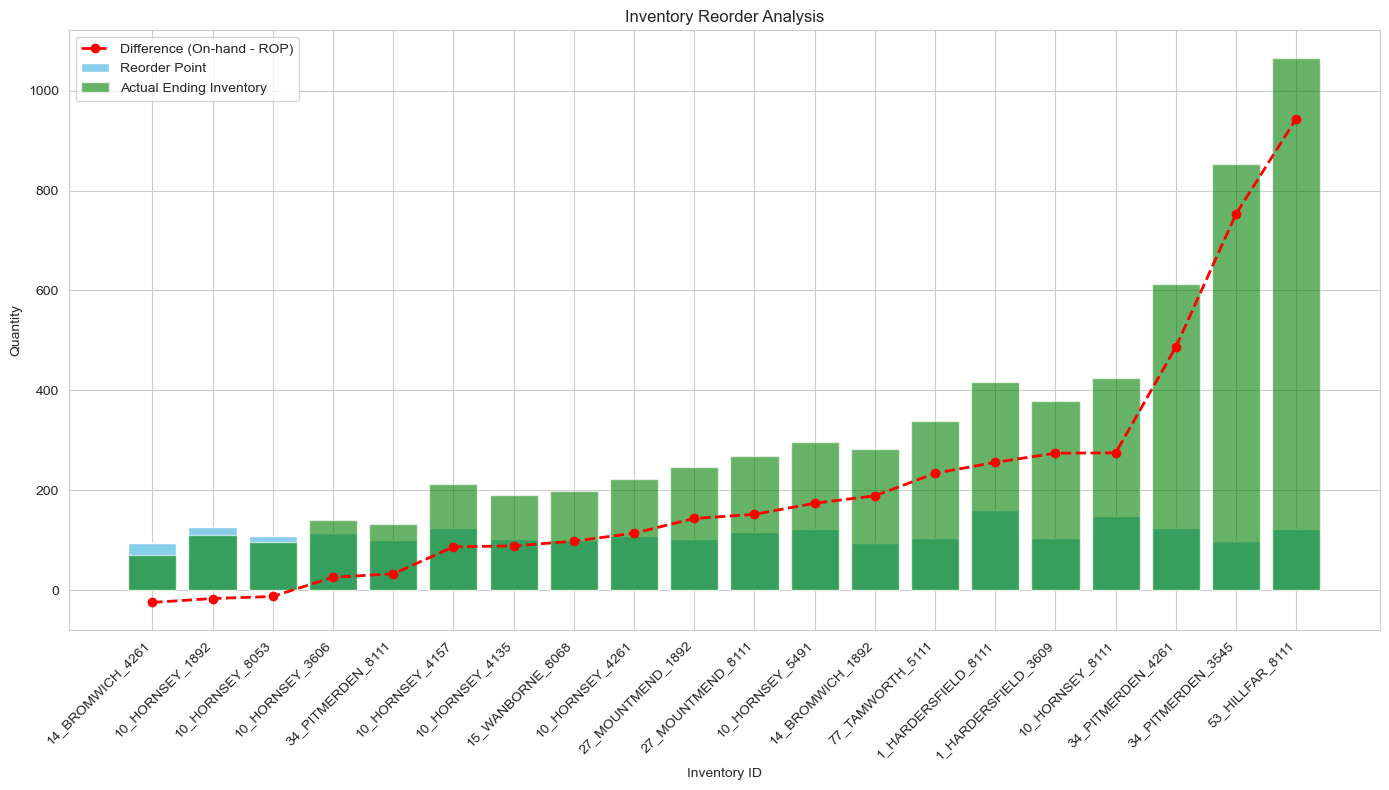

In [40]:
# Assuming 'comparison' is the DataFrame from the previous step
# Sort the values based on the difference for better visualization
comparison_sorted = comparison.sort_values('Difference')

# Plotting
plt.figure(figsize=(14, 8))

# Reorder Point
plt.bar(comparison_sorted['InventoryId'], comparison_sorted['Reorder Point'], color='skyblue', label='Reorder Point')

# Actual Ending Inventory
plt.bar(comparison_sorted['InventoryId'], comparison_sorted['onHand_end'], color='green', alpha=0.6, label='Actual Ending Inventory')

# Overlay Difference as a line for clarity
plt.plot(comparison_sorted['InventoryId'], comparison_sorted['Difference'], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Difference (On-hand - ROP)')

# Labels and Title
plt.xlabel('Inventory ID')
plt.ylabel('Quantity')
plt.title('Inventory Reorder Analysis')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
# Ensure the 'SalesDate' and 'ReceivingDate' are in datetime format for accurate calculations
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])

# Calculate total sales days for ADS calculation (assuming a year of sales data)
total_sales_days = (sales['SalesDate'].max() - sales['SalesDate'].min()).days

# Assuming a holding cost as a percentage of the unit cost (e.g., 25%)
holding_cost_percentage = 0.25

# Estimated order cost (S) - Adjust this value based on your actual order costs
order_cost_per_order = 50

# Identify the products from the top 20 that have an actual ending inventory lower than the reorder point
products_to_reorder = comparison[comparison['Difference'] < 0]

# Filter the sales and purchases data for the top 20 products requiring reorder
sales_top20 = sales[sales['InventoryId'].isin(products_to_reorder['InventoryId'])]
purchases_top20 = purchases[purchases['InventoryId'].isin(products_to_reorder['InventoryId'])]

# Calculate the average unit cost and annual demand for these products
average_unit_cost = purchases_top20.groupby('InventoryId')['PurchasePrice'].mean()
annual_demand = sales_top20.groupby('InventoryId')['SalesQuantity'].sum()

# Calculate holding cost per unit
holding_cost_per_unit = average_unit_cost * holding_cost_percentage

# Function to calculate EOQ
def calculate_eoq(demand, order_cost, holding_cost):
    if demand > 0 and holding_cost > 0:
        return np.sqrt((2 * demand * order_cost) / holding_cost)
    else:
        return 0

# Calculate EOQ for each of the top 20 products needing reorder
eoq_values = {}
for inventory_id in products_to_reorder['InventoryId']:
    demand = annual_demand.get(inventory_id, 0)
    holding_cost = holding_cost_per_unit.get(inventory_id, 0)
    eoq = calculate_eoq(demand, order_cost_per_order, holding_cost)
    eoq_values[inventory_id] = eoq

# Convert the EOQ results to a DataFrame for display
eoq_df = pd.DataFrame(list(eoq_values.items()), columns=['InventoryId', 'EOQ'])

print("EOQ for Top 20 Products Needing Reorder:")
print(eoq_df)


EOQ for Top 20 Products Needing Reorder:
        InventoryId         EOQ
0   10_HORNSEY_1892  715.308791
1  14_BROMWICH_4261  145.005491
2   10_HORNSEY_8053  646.632301
